### 🎬 Recomendação de Filmes com Álgebra Linear

Este notebook explica conceitos de **Álgebra Linear** através de um sistema de recomendação de filmes.
Cada seção aborda um tópico com teoria e aplicação prática.

In [102]:
import numpy as np

###  1. Sistemas de Equações Lineares

Imagine que estamos desenvolvendo um sistema de recomendação de filmes baseado nas preferências de um usuário.  
Cada filme possui um peso atribuído para três gêneros principais: **Ação**, **Comédia** e **Ficção Científica**.  
Nosso objetivo é encontrar a recomendação ideal analisando as preferências do usuário em relação aos filmes disponíveis.
 
<figure style="text-align: center;">
    <img src="../../images/parte2/transformer_movie.png" alt="Transformers Movie" width="300">
    <figcaption style="font-size: 12px;">Figura 1 - Pôster do filme *Transformers*, representando os pesos de cada gênero.</figcaption>
</figure>





Matriz representando os filmes e seus pesos para cada gênero (linhas: filmes, colunas: gêneros)

In [115]:
filmes = np.array([
    [5, 2, 7],  # Transformers: mais peso em Ação, médio em Comédia e muita Ficção Científica
    [1, 5, 3],  # Superbad: mais peso em Comédia, médio em Ficção e pouco em Ação
    [2, 1, 10]   # Interestelar: mais peso em Ficção Científica, menos em Comédia e um pouco em Ação
])

Preferências do usuário por gênero, representadas como um vetor  
 O usuário gosta bem menos de Comédia, porém gosta bem mais de ação e Ficção.

In [116]:
peso_acao = 1
peso_comedia = 8
peso_ficcao = 3

usuario = np.array([peso_acao, peso_comedia, peso_ficcao])

###  2. Operações com Matrizes: Transposição

A transposição altera a estrutura da matriz, convertendo **linhas em colunas** e vice-versa.   

In [105]:
filmes_transposto = filmes.T #Permite visualizar os gêneros como linhas e os filmes como colunas.

###  3. Solução de Sistemas Lineares: Multiplicação de Matriz-Vetor

Multiplicamos a matriz de filmes pelo vetor de preferências do usuário.  
O resultado nos dá um escore para cada filme, indicando quão bem ele se alinha às preferências do usuário.

In [106]:
recomendacao = filmes @ usuario

### 4. Espaços Vetoriais: Representação Matemática da Recomendação

O conjunto de filmes pode ser interpretado como um espaço vetorial tridimensional,  
onde cada filme ocupa um ponto no espaço definido pelas preferências do usuário.  
 


In [119]:
import plotly.graph_objects as go

# Extraindo valores corretamente da matriz filmes
x = filmes[:, 0]  # Ação
y = filmes[:, 1]  # Comédia
z = filmes[:, 2]  # Ficção Científica
nomes_filmes = ["Transformers", "Superbad", "Interestelar"]

# Criando o gráfico 3D
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    marker=dict(size=10, color=['red', 'blue', 'green']),
    text=nomes_filmes,
    textposition="top center"
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Ação',
        yaxis_title='Comédia',
        zaxis_title='Ficção Científica'
    ),
    title="Espaço Vetorial da Recomendação de Filmes"
)

fig.show()





### 5. Independência Linear: Identificando Redundância nos Filmes
Se algum dos vetores (filmes) for uma combinação dos outros, há dependência linear.  
Isso significa que um dos filmes não traz informação nova em relação aos demais.  
O determinante da matriz de filmes indica se há dependência linear:  

In [108]:
det_f = np.linalg.det(filmes)
print(f"Determinante da matriz de filmes: {det_f}")
if det_f == 0:
    print("Os vetores de filmes são linearmente dependentes.")
else:
    print("Os vetores de filmes são linearmente independentes.")

Determinante da matriz de filmes: 163.99999999999991
Os vetores de filmes são linearmente independentes.


🔍 6. Posto(Rank) da Matriz

O **posto** indica o número de vetores independentes dentro da matriz.

In [109]:
rank_f = np.linalg.matrix_rank(filmes)
print(f"Posto da matriz de filmes: {rank_f}")

Posto da matriz de filmes: 3


### 7. Mapeamentos Lineares: Ajuste dos Pesos

Para melhorar a recomendação, aplicamos um ajuste ponderado aos filmes.  
Criamos uma matriz identidade (que não altera os valores originais).

In [110]:
matriz_identidade = np.eye(3)


Calculamos a matriz ajustada usando a inversa (para balancear pesos)

In [111]:
matriz_ajustada = np.linalg.inv(matriz_identidade + filmes)

Aplicamos o ajuste à recomendação inicial para refinar os resultados

In [112]:
ajuste_final = matriz_ajustada @ recomendacao


###  8. Espaço Afim: Considerando um Deslocamento no Modelo

Adicionamos um fator de deslocamento para capturar pequenas nuances nas preferências.   
deslocamento = np.array([1, -1, 2])  

In [113]:
deslocamento = np.array([1, -1, 2])
ajuste_final += deslocamento # Pequena alteração nos valores finais para enriquecer o modelo

### 9. Selecionando o Melhor Filme

Usamos a função argmax para identificar o índice do filme com maior score ajustado

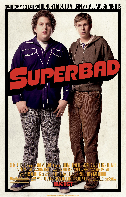

In [117]:

 
from IPython.display import display
from PIL import Image

 
nomes_filmes = ["../../images/parte2/transformer_icon.png", "../../images/parte2/superbad_icon.png", "../../images/parte2/interstelar_icon.png"]
melhor_filme_indice = np.argmax(ajuste_final)

melhor_filme_imagem = nomes_filmes[melhor_filme_indice]
 
imagem = Image.open(melhor_filme_imagem)
display(imagem)
